In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://drive.google.com/file/d/1jU38cWxHrKGLg1nWO_wW8031z7d1HpnO/view?usp=drive_link

id='1jU38cWxHrKGLg1nWO_wW8031z7d1HpnO'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('googleplaystore.csv')

In [ ]:
apps = pd.read_csv("googleplaystore.csv")

In [ ]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
apps.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [ ]:
apps["App"].duplicated().sum()
# Hay aplicaciones repetidas, las sacamos

1181

In [ ]:
apps1 = apps.drop_duplicates(subset = "App")
# Nos quedamos unicamente con la primer repeticion de aquellas Apps que se repiten
apps1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
apps1["App"].duplicated().sum()
# Los eliminamos correctamente

0

In [ ]:
apps1["Rating"].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
apps2 = apps1.drop(apps1[apps1["Rating"] > 5].index)
# Al hacer el unique, vemos que hay un rating que no esta entre 1 y 5, lo eliminamos
apps2["Rating"].unique()
# En este caso, los NaNs no los vamos a eliminar. En el boxplot por ej. los eliminamos ya que iban a influir en el plot,
# pero en este caso como no vamos a utilizar los ratings, los dejamos. El rating '19' sí lo sacamos ya que es algo imposible,
# mientras que los ratings NaNs queda a criterio de uno si modificarlos a un '1' o si eliminarlos.

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
apps2.count()

App               9659
Category          9659
Rating            8196
Reviews           9659
Size              9659
Installs          9659
Type              9658
Price             9659
Content Rating    9659
Genres            9659
Last Updated      9659
Current Ver       9651
Android Ver       9657
dtype: int64

In [ ]:
apps2["Size"].unique()
# A priori parece que tenemos 3 categorias: aquellos pesos que terminan en M (de mb), aquellos que terminan
# en k (de kb), y aquellos que varian segun el dispositivo.

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
(apps2["Size"].str.endswith("Varies with device").sum() + apps2["Size"].str.endswith("k").sum() +
 apps2["Size"].str.endswith("M").sum()) == apps2["Size"].count()
#  Corroboramos que son las unicas categorias

True

In [ ]:
# Vamos a tener que tomar un criterio: usaremos los tamaños en mb, eliminamos las M de los tamaños que terminen en M,
# luego aquellos que terminen en k los pasamos a mb (eliminando la k), y para 'Varies with device' los pasamos a NaNs
apps3 = apps2.copy()
apps3["Size"] = apps3["Size"].str.rstrip("k")
def convertir_a_kilos(fila):
    if fila.endswith('M'):
        return round(float(fila.rstrip('M')) * 1000)
    return fila
apps3["Size"] = apps3["Size"].apply(convertir_a_kilos)
apps3["Size"] = apps3["Size"].replace("Varies with device", np.nan)
apps3["Size"].unique()

array([19000, 14000, 8700, 25000, 2800, 5600, 29000, 33000, 3100, 28000,
       12000, 20000, 21000, 37000, 2700, 5500, 17000, 39000, 31000, 4200,
       7000, 23000, 6000, 6100, 4600, 9200, 5200, 11000, 24000, nan, 9400,
       15000, 10000, 1200, 26000, 8000, 7900, 56000, 57000, 35000, 54000,
       '201', 3600, 5700, 8600, 2400, 27000, 2500, 16000, 3400, 8900,
       3900, 2900, 38000, 32000, 5400, 18000, 1100, 2200, 4500, 9800,
       52000, 9000, 6700, 30000, 2600, 7100, 3700, 22000, 7400, 6400,
       3200, 8200, 9900, 4900, 9500, 5000, 5900, 13000, 73000, 6800, 3500,
       4000, 2300, 7200, 2100, 42000, 7300, 9100, 55000, '23', 6500, 1500,
       7500, 51000, 41000, 48000, 8500, 46000, 8300, 4300, 4700, 3300,
       40000, 7800, 8800, 6600, 5100, 61000, 66000, '79', 8400, '118',
       44000, '695', 1600, 6200, '18', 53000, 1400, 3000, 5800, 3800,
       9600, 45000, 63000, 49000, 77000, 4400, 4800, 70000, 6900, 9300,
       8100, 36000, 84000, 97000, 2000, 1900, 1800, 5300, 47

In [ ]:
apps3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
apps3["Size"] = apps3["Size"].astype(float)
apps3.groupby("Android Ver").mean()

<ipython-input-21-cc379ff021d0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  apps3.groupby("Android Ver").mean()


,Rating,Size
Android Ver,,
1.0 and up,4.050000,3855.500000
1.5 and up,4.050000,5071.631579
1.6 and up,4.087356,3119.137931
2.0 and up,4.370370,6256.806452
2.0.1 and up,4.328571,22222.142857
2.1 and up,4.146429,5584.451128
2.2 - 7.1.1,NaN,5100.000000
2.2 and up,3.977340,8220.923729
2.3 and up,4.092687,20263.316832


Text(0, 0.5, 'Cantidad de apps')

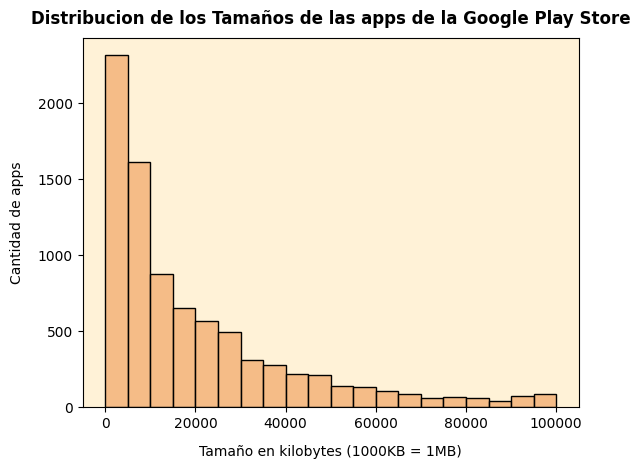

In [ ]:
# Por ultimo convertimos la columna a float para poder plotearla, y construimos nuestro histograma
apps3["Size"] = apps3["Size"].astype(float)
sns.set_style(rc = {'axes.facecolor': 'FFF2D7'})
sns.histplot(apps3["Size"], color='#F2AB6D', bins = 20, edgecolor = "black")
plt.title("Distribucion de los Tamaños de las apps de la Google Play Store", fontweight='bold', pad = 10)
plt.xlabel("Tamaño en kilobytes (1000KB = 1MB)", labelpad = 10)
plt.ylabel("Cantidad de apps", labelpad = 10)